# TP 4 : Convergence des schémas numériques
  

In [22]:
import numpy as np # donne acces a la librairie numpy, et definit l'abbreviation np
import scipy        # donne acces aux librairies scipy, scipy.linalg et scipy.integrate
import scipy.linalg
import scipy.integrate
import matplotlib.pyplot as plt # donne acces a la librairie matplotlib.pyplot, et definit l'abbreviation plt
import math     # donne acces aux fonctions et constantes mathematiques
from math import exp
%matplotlib inline    
# ouvre les fenetres graphiques dans le notebook

### Exercice 1.
Considérons l'équation différentielle d'ordre 2 suivante
$$
\ddot{x} = -\frac{g}{l} \sin(x)
$$
Elle modélise la dynamique d'un pendule simple, dont l'énergie totale est donnée par
$$
H = E_c + E_p = \frac{1}{2}l^2\dot{x}^2 + gl(1 - \cos(x))
$$
Nous allons voir que le schéma d'Euler simple ne préserve pas l'énergie totale des systèmes, ce qui peut être
problématique lorsque l'on veut simuler des temps longs. Nous allons voir que certaines méthodes permettent de pallier ce problème.

On fixera $T = 20$, $l=1$, $g = 9.81$, $x(0) = 1$ et $\dot{x} = 0$.


On considère l'équation sous la forme d'un système différentiel du 1er ordre.
$$
\begin{cases}
\dot{x}(t) = v(t)\\
\dot{v}(t) = -\displaystyle\frac{g}{l} \sin(x(t)) \\
x(0) = x_0\\
v(0)=v_0
\end{cases}
$$

a) Écrire la fonction second membre du système différentiel.


In [23]:
T = 20.
l= 1.
g = 9.81
x0= 1.
v0= 0.
gsl=g/l
t0 = 0
def f2(t,X):
    Y= np.array([X[1],-gsl*np.sin([X[0]]) ]) 
    return Y


b)
Calculer une solution approchée avec la méthode d’Euler Explicite.
Compléter la fonction plotsol2 ci-dessous pour afficher la solution.
Tracer la solution (position et vitesse) en fonction du temps et, dans une autre fenêtre, dans l'espace des phases (la vitesse en fonction de la position). 

In [24]:
def EulerExplicite(t0, x0, T, dt, f):
    
    if np.size(x0)==1: 
        x0 = np.array([float(x0)])
       
    TPS = np.arange(t0,T+dt,dt)
    N = len(TPS)
    X = np.zeros((N,len(x0)))
    X[0] = x0
    
    for i in range(1,N) :
        X[i] = X[i-1] + (T/N)*f(TPS[i-1],X[i-1])
    # indices : TPS est un vecteur ligne contenant les (N+1) temps intermediaires (t0, ..., tN)
    #           X a autant de colonnes que X0 et N+1 lignes; le résultat au temps ti est sur la ligne (i+1)
    
    return TPS, X

In [25]:
#from matplotlib import rcParams
#rcParams.update({'figure.autolayout': True})
def plotsol2(t,liste_X,leg):
    liste_pos=[]
    liste_vit=[]
    for X in liste_X:
        pos=[x[0] for x in X]
        vit=[x[1] for x in X]
        liste_pos.append(pos)
        liste_vit.append(vit)
    plt.subplot(2,2,1)
    # le graphe de la position en fonction du temps
    for pos in liste_pos:
        plt.plot(t,pos)
    plt.xlabel('t')
    plt.ylabel(r'$x(t)$')

    plt.subplot(2,2,3)
    # le graphe de la vitesse en fonction du temps
    for vit in liste_vit:
        plt.plot (t,vit)
    plt.xlabel('t')
    plt.ylabel(r'$\dot x(t)$')

    plt.subplot(1,2,2)
    #le graphe dans l'espace des phases
    for pos,vit in zip(liste_pos,liste_vit):
        plt.plot(pos,vit)
    plt.xlabel('x')
    plt.ylabel(r'$\dot x$')
    plt.legend(leg)
    plt.tight_layout()

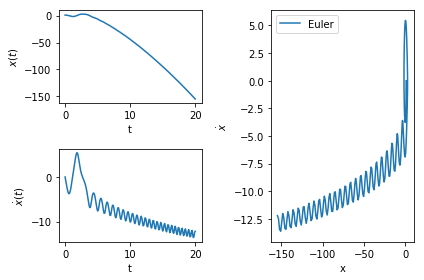

In [26]:
X0=np.array([x0,v0])
dt=0.1
TPS,X_EE=EulerExplicite(0, X0, T, dt, f2)
plotsol2(TPS,[X_EE] ,['Euler'])

c) On définit ci dessous la méthode d'Euler symplectique, pour un système différentiel autonome comprenant un nombre pair d'équations:
 <ul>
<li>  Donnée initiale : $x(t_0)$, $v(t_0)$, temps final $T$, pas de temps $\Delta t$
<li> Résultat : Approximation de la fonction vectorielle $(x(t),v(t))$ solution du problème de Cauchy :
$$\left\{\begin{array}{l}\dot{x}(t) = f(x(t),v(t))\\
  \dot{v}(t) = g(x(t),v(t))\\
  x(t_0)=x_0\\ v(t_0) = v_0\end{array}\right.$$
<li>  Tant que $t<T$ faire :
<ul>
<li>$t_{n+1} = t_n + \Delta t$
<li>$x_{n+1} = x_n + \Delta t f(x_n,v_n)$
<li>$v_{n+1} = v_n + \Delta t g(x_{n+1},v_{n})$
 <li>$n=n+1$
 </ul>
</UL>
Quelle est la différence avec le schéma d'Euler explicite ? S'agit-il d'un schéma explicite ou implicite ?
Calculer la solution approchée du problème introduit précédemment avec ce schéma.



Vos réponses rédigées ici : 
La différence avec le schéma d'Euler explicite est qu'on dissocie la mise à jour de $x_n$ et de $v_n$. Pour mettre à jour la deuxième composante, c'est-à-dire pour calculer $v_{n+1}$, on utilise la nouvelle valeur $x_{n+1}$ au lieu de $x_n$ dans le schéma EE. On pourrait d'ailleurs utiliser le schéma d'Euler symplectique symétrique de celui-ci
<ul>
<li>$t_{n+1} = t_n + \Delta t$
<li>$v_{n+1} = v_n + \Delta t g(x_n,v_n)$
<li>$x_{n+1} = x_n + \Delta t f(x_{n},v_{n+1})$


Le schéma d'Euler symplectique est explicite. En effet, quelle que soit la fonction $f$, même non linéaire on peut exprimer le  vecteur $x_{n+1},v_{n+1}$ explicitement en fonction du vecteur $x_n, v_n$ :

$$(x_{n+1},v_{n+1})=\phi(x_{n},v_{n})=(x_n+\Delta t  f(t_n,x_n,v_n),v_n + \Delta t f(t_{n+1},x_n+\Delta t  f(t_n,x_n,v_n),v_{n})$$


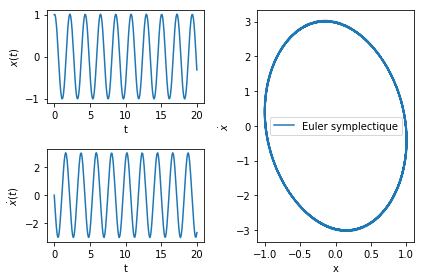

In [27]:
#votre  solution ci-dessous
def EulerSymplectique(t0, X0, T, dt, f,g):
    ### à compléter
    if np.size(X0)==1: 
        X0 = np.array([float(x0)])
       
    TPS = np.arange(t0,T+dt,dt)
    N = len(TPS)
    X = np.zeros((N,len(X0)))
    X[0] = X0
    for i in range(1,N) :
        X[i,0] = X[i-1,0] + (T/N)*f(X[i-1,0],X[i-1,1])
        X[i,1] = X[i-1,1] + (T/N)*g(X[i,0],X[i-1,1])
    # indices : TPS est un vecteur ligne contenant les (N+1) temps intermediaires (t0, ..., tN)
    #           X a autant de colonnes que X0 et N+1 lignes; le résultat au temps ti est sur la ligne (i+1)
    
    return TPS, X
def f(x,v):
    return v
def g(x,v):
    return -gsl*math.sin(x)
X0=np.array([x0,v0])
dt=0.1
TPS,X_ES=EulerSymplectique(0, X0, T, dt, f,g)
plotsol2(TPS,[X_ES],['Euler symplectique'])

d) Etude qualitative : comparer graphiquement les graphes en fonction du temps et dans l'espace des phases obtenus avec les deux méthodes, pour ∆t = 0.1 et  pour ∆t = 0.01. Commenter.

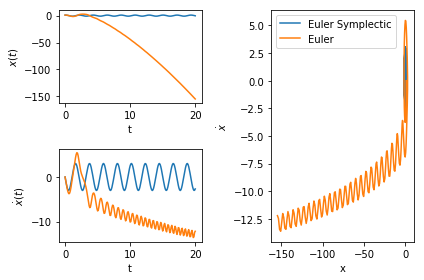

In [28]:
#dt=0.1
### à compléter
dt=0.1
TPS,X_ES=EulerSymplectique(0, X0, T, dt, f,g)
TPS,X_EE=EulerExplicite(0, X0, T, dt, f2)
plotsol2(TPS,[X_ES,X_EE] ,['Euler Symplectic','Euler'])

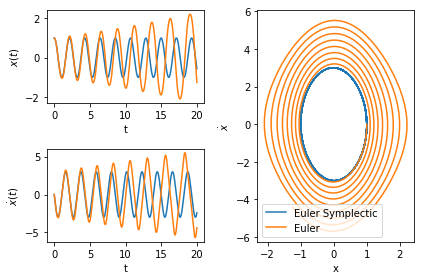

In [29]:
#dt=0.01
### à compléter
dt=0.01
TPS,X_ES=EulerSymplectique(0, X0, T, dt, f,g)
TPS,X_EE=EulerExplicite(0, X0, T, dt, f2)
plotsol2(TPS,[X_ES,X_EE] ,['Euler Symplectic','Euler'])


e) Comparer graphiquement les graphes dans l’espace des phases (x,v) obtenues avec les deux méthodes, pour $\Delta t=0.01$. Superposer sur le même graphique le champ de vecteurs associé à la dynamique (avec la fonction quiver).


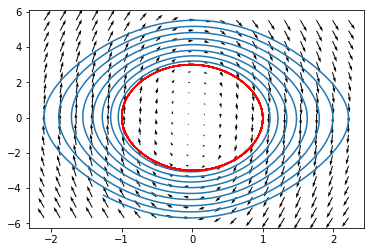

In [30]:
#votre  solution ci-dessous
pos=X_EE[:,0] 
vit=X_EE[:,1] 
    
n=20
Xtv, Ytv = np.meshgrid(np.linspace(min(pos), max(pos), n), np.linspace(min(vit), max(vit), n))
Field=[f2(0.,[xt,yt]) for xt,yt in zip(Xtv,Ytv)]
U=[F[0] for F in Field]
V=[F[1] for F in Field]
Q = plt.quiver(Xtv, Ytv, U, V)
plt.plot(pos,vit)

pos=X_ES[:,0]
vit=X_ES[:,1]
plt.plot(pos,vit,'r')
plt.show()

f) Montrer que l'hamiltonien $h(t)=H(x(t),v(t))$ est une fonction constante. 
Tracer l’hamiltonien $H(x(t),v(t))$ au cours du temps approché avec les deux méthodes ainsi que sa valeur théorique. Commentez ces résultats. 

Vos réponses rédigées ici :

Deux méthodes sont possibles. 

Une méthode consiste à dériver directement la fonction 
$t \rightarrow h(t) = \tfrac{1}{2} l^2 v^2(t) + gl(1 - cos(x(t)) $ en utilisant les EDO du problème de Cauchy.
On a alors 
\begin{eqnarray}
h'(t)&=&l^2v'(t)v(t) + glx'(t)\sin(x(t))\\
&=&l^2\left(-\displaystyle\frac{g}{l} \sin(x(t))\right)v(t)+glv(t)\sin(x(t))\\
&=&0\end{eqnarray}
Pour tracer sa valeur théorique on le calcule en $t=0$
$$h(t)=\frac{1}{2}l^2v_0^2 + gl(1 - \cos(x_0)),\quad \forall t$$

Une autre méthode consiste à observer que l'on peux écrire l'EDO comme
\begin{align}
\dot{X} = J \nabla H(X)
\end{align}
On peut montrer alors que la fonction $ t \rightarrow H(X(t))$ est une constante.
En effet :
\begin{align}
\frac{d}{dt} H(X(t)) = \nabla H^T_{X(t)} J \nabla H_{X(t)} 
= \begin{pmatrix}
-\dot{v}(t) & \dot{x}(t)
\end{pmatrix}
\begin{pmatrix}
\dot{x}(t) \\
\dot{v}(t)
\end{pmatrix}
=
0
\end{align}
avec
\begin{align}
J = \begin{pmatrix}
0_m & I_m \\
- I_m & 0_m
\end{pmatrix}
\end{align}
et 
\begin{align}
H : \begin{pmatrix}
x  \\
v 
\end{pmatrix}
\rightarrow
\tfrac{1}{2} l^2 v^2 + gl(1-cos(x))
\end{align}

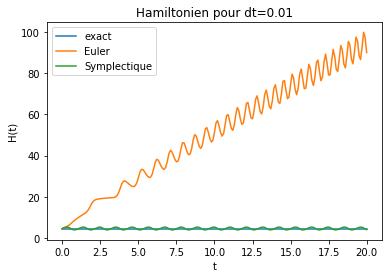

In [13]:
#votre  solution ci-dessous
g = 9.98
l = 1.0
def hamiltonien_exact():
    H = 0.5*l**2*v0**2 + gsl*(1. - math.cos(x0)) ### à compléter
    return H
def hamiltonien_approche(X):
    one = np.ones(len(X[:,0]))
    H = 0.5*l**2*X[:,1]**2 + g*l*(one - np.cos(X[:,0])) ### à compléter
    return H
H_Ex= hamiltonien_exact()### à compléter
H_EE= hamiltonien_approche(X_EE)### à compléter
H_ES= hamiltonien_approche(X_ES)### à compléter
plt.plot([0,T],[H_Ex,H_Ex],TPS,H_EE,TPS,H_ES)
plt.legend(['exact','Euler','Symplectique'],loc=2)
plt.title('Hamiltonien pour dt=0.01')
plt.xlabel('t')
plt.ylabel('H(t)')
plt.show()

### Exercice 2. Solution exacte, méthode d'Euler explicite et Méthode de Runge Kutta d'ordre 2 (RK2)

Considérons l’équation différentielle linéaire suivante
$$\left\{\begin{array}{l}RC\,\dot{u}(t) +u(t)= e(t),\\ u(0)=u_0\end{array}\right.$$
qui modélise la tension aux bornes du condensateur dans un circuit RC (c'est-à-dire composé d'une résistance et d'un condensateur montés en série). Dans les applications numériques on fixera la constante $RC=0.1$.


a)
Ecrire une fonction $solexa$ retournant la solution exacte avec $e(t) = 0.$




In [14]:
#votre  solution ci-dessous
def solexa(t,u0,RC):
    u=u0*np.exp(-t/RC)
    return u

b) Donner la fonction $f:R\times R\rightarrow R$ telle que l'équation différentielle ci-dessus 
s'écrit sous la forme canonique $\dot u(t)=f(u(t),t)$. 

Donner une solution approchée avec la méthode d’Euler.

Soient $u_0=1$, $T=1$ le temps final, comparer graphiquement la courbe obtenue avec la solution exacte, celle obtenue avec la solution approchée pour un pas de temps $\Delta t$ = 0.1 et celle obtenue pour $\Delta t$ = 0.0001. 

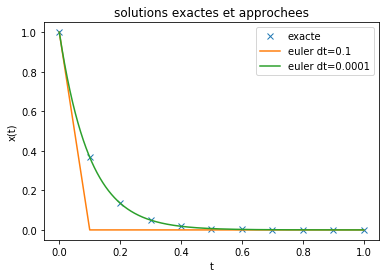

In [15]:
#votre  solution ci-dessous
RC=0.1

def e(t):
    return 0.   # on a choisi d'après a) e(t)=0

def f(t,x,e ) : ### à compléter):
    return (-x + e(t))/RC ### à compléter


def EulerExplicite(t0, x0, T, dt, f):
    ### à compléter
        # écrire la fonction ici
    if np.size(x0)==1: 
        x0 = np.array([float(x0)])
       
    TPS = np.arange(t0,T+dt,dt)
    N = len(TPS)
    X = np.zeros((N,len(x0)))
    X[0] = x0
    
    for i in range(1,N) :
        X[i] = X[i-1] + (T/(N-1))*f(TPS[i-1],X[i-1],e)
    # indices : TPS est un vecteur ligne contenant les (N+1) temps intermediaires (t0, ..., tN)
    #           X a autant de colonnes que X0 et N+1 lignes; le résultat au temps ti est sur la ligne (i+1)
    
    return TPS, X

u0=1.
t0=0.
T=1.
    
dt=0.1
TPS_1,X_EE_1= EulerExplicite(t0, x0, T, dt, f) ### à compléter  
Xex= solexa(TPS_1,u0,RC) ### à compléter]
    
dt=0.0001
TPS_2,X_EE_2 = EulerExplicite(t0, x0, T, dt, f)### à compléter
plt.plot(TPS_1,Xex,'x' )
plt.plot(TPS_1,X_EE_1 )
plt.plot(TPS_2,X_EE_2 )### à compléter)
plt.title('solutions exactes et approchees')
plt.legend(['exacte','euler dt=0.1','euler dt=0.0001'], loc=1)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()


c) Donner une solution approchée avec la méthode de Runge Kutta d'ordre 2 (RK2) qui est explicitée ci-dessous.
<UL>
<li>Donnée initiale $x(t_0)$, temps final $T$, pas de temps $\Delta t$
<li>  $x_0 = x(t_0)$
<li>  Tant que $t<T$
<UL><li>    $t_{n+1} = t_n + \Delta t$
 <li>   $x_\star = x_n + \Delta t\,f(x_n,t_n)$
<li>   $x_{n+1} = x_n + \Delta t\,\frac{f(x_n,t_n) + f(x_\star,t_{n+1})}{2}$
 </UL> 
 <li> Résultat : Approximation de la fonction $x$ solution du problème de Cauchy
 $$\left\{\begin{array}{l}\dot{x}(t)= f(x(t),t),\\ x(t_0)=x_0\end{array}\right.$$
</UL>
 
<cite><font color="red">Remarque </font></cite>: On remarquera dans le programme RK2 ci-dessous qu'on a bien évité de calculer deux fois $f(x_n,t_n)$, en stockant cette valeur dans une variable intermédiaire $f_\star$


In [16]:
#votre  solution ci-dessous
def RK2(t0, x0, T, dt, f):
    ### à compléter
        # écrire la fonction ici
    if np.size(x0)==1: 
        x0 = np.array([float(x0)])
       
    TPS = np.arange(t0,T+dt,dt)
    N = len(TPS)
    X = np.zeros((N,len(x0)))
    X[0] = x0
    
    for i in range(1,N) :
        Xstar = X[i-1] + (T/(N-1))*f(TPS[i-1],X[i-1],e)
        X[i] = X[i-1] + 0.5*(T/(N-1))*(f(TPS[i-1],X[i-1],e) + f(TPS[i],Xstar,e))
    # indices : TPS est un vecteur ligne contenant les (N+1) temps intermediaires (t0, ..., tN)
    #           X a autant de colonnes que X0 et N+1 lignes; le résultat au temps ti est sur la ligne (i+1)
    
    return TPS, X


d) Etude qualitative : comparer graphiquement la courbe obtenue avec la solution exacte, celle obtenue avec la solution approchée RK2 pour  $ \Delta t$ = 0.1 et celle obtenue pour $\Delta t$ = 0.0001. Commenter.

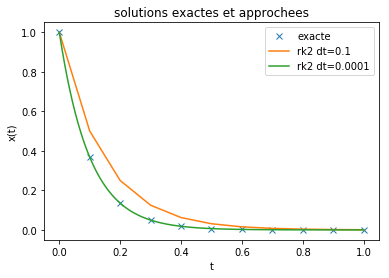

In [17]:
dt=0.1
TPS_1,X_rk2_1=  RK2(t0, x0, T, dt, f) ### à compléter
dt=0.0001
TPS_2,X_rk2_2=  RK2(t0, x0, T, dt, f) ### à compléter

plt.plot(TPS_1,Xex,'x' )
plt.plot(TPS_1,X_rk2_1 )
plt.plot(TPS_2,X_rk2_2 ) ### à compléter)
plt.title('solutions exactes et approchees')
plt.legend(['exacte','rk2 dt=0.1','rk2 dt=0.0001'], loc=1)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()


e) Etude quantitative : On calcule l'erreur au temps final $T$ pour une discrétisation $t_0,\ldots ,t_N=T$
$$E_N=|x(T)−x_N|$$ 
Tracer en échelle logarithmique la courbe d’erreur en fonction de  $ \Delta t$ pour les valeurs  suivantes de $\Delta t$ : 0.1, 0.01, 0.001, 0.0001, 0.00001. Comparer cette courbe avec les courbes $\sqrt{\Delta t}$, $\Delta t$ et $ \Delta t^2$. Commenter.

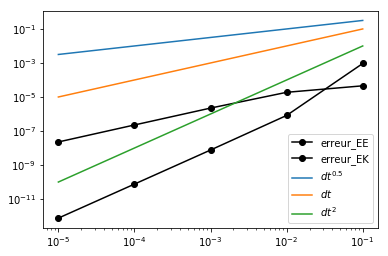

In [18]:
#votre code ci-dessous
def calc_erreur(dt,schema):
    ### à compléter
    TPS,X=schema(t0, x0, T, dt, f)
    Xex=solexa(TPS[-1],u0,RC)
    return abs(X[-1]-Xex)

x0=1.
erreur_EE=[]
erreur_EK=[]
delta_t = [0.1,0.01,0.001,0.0001,0.00001]
for dt in delta_t:
    N=int(T/dt)
    er=calc_erreur(dt,EulerExplicite)
    erreur_EE.append(er)
    er=calc_erreur(dt,RK2)
    erreur_EK.append(er)
delta_sqrt= np.sqrt(delta_t) 
delta_2= [dt**2 for dt in delta_t] 
plt.plot(delta_t,erreur_EE,'-ok',delta_t,erreur_EK,'-ok',delta_t,delta_sqrt,delta_t,delta_t,delta_t,delta_2)
plt.plot()
plt.xscale('log')
plt.yscale('log')
plt.legend(['erreur_EE','erreur_EK',r'$dt^{0.5}$',r'$dt$',r'$dt^2$'],loc=4)
plt.show()


<cite><font color="red">Remarque </font></cite>: En utilisant un développement de Taylor, on peut montrer que l’erreur pour la méthode d’Euler est en $O(∆t)$, 
et celle de RK2 en $O(∆t^2)$.
On écrit un développement de Taylor de la solution $u(t)$

$$ u(t+\Delta t)=u(t)+\Delta t u'(t)+\frac{\Delta t^2}{2} u''(\tau),\mbox{ avec } t\leq \tau\leq t+\Delta t$$
On a donc, en utilisant le fait que $u$ est solution de l'ODE, donc que $u'(t)=f(u(t),t)$
$$ u(t_{k+1})-u(t_k)-\Delta t~f(u(t_k),t_k)=\frac{\Delta t^2}{2} u''(\tau) \mbox{ avec } 
t_k\leq \tau\leq t_{k+1} t$$
En faisant la différence avec l'équation du schéma d'Euler $u_{k+1}=u_k+\Delta t~f(u_k,t_k)$ on obtient
$$ u(t_{k+1})-\bar u_{k+1}=u(t_k)-\bar u_k+\Delta t~(f(u(t_k),t_k)-f(u_k,t_k))+\frac{\Delta t^2}{2} u''(\tau) \mbox{ avec } t_k\leq \tau\leq t_{k+1} t$$
Posons $E_k=|x(t_k)−x_k|$ on obtient
$$ E_{k+1}=|u(t_k)-\bar u_k+\Delta t~(f(u(t_k),t_k)-f(u_k,t_k))+\frac{\Delta t^2}{2} u''(\tau)|$$
soit, en utilisant l'inégalité triangulaire,
$$ E_{k+1}\leq E_k+\Delta t~\left |f(u(t_k),t_k)-f(u_k,t_k))\right |+\frac{\Delta t^2}{2} |u''(\tau)|$$
Ici, pour pouvoir conclure dans le cas général, il faut faire une hypothèse sur la fonction second membre $f(u,t)$ par exemple qu'elle est Lipschitzienne par rapport à la variable $u$. Dans notre exemple est est linaire, on a donc
$$ E_{k+1}\leq E_k+\Delta t~RC~E_k+\frac{\Delta t^2}{2} |u''(\tau)|$$


$$ u(t+\Delta t)=u(t)+\Delta t u'(t)+\frac{\Delta t^2}{2} u''(t)++\frac{\Delta t^3}{6} u^{(3)}(\tau),\mbox{ avec } t\leq \tau\leq t+\Delta t$$
